In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
inf_times = pd.read_csv('linear_inference_times.csv')
inf_histo = pd.read_csv('linear_train_history.csv', index_col=0)

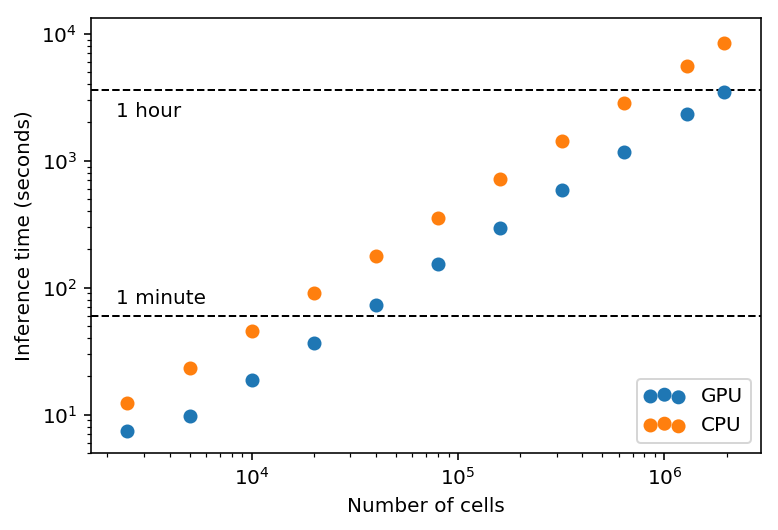

In [3]:
plt.loglog()
plt.scatter(inf_times.cell_numbers, inf_times.gpu_inference_time, label='GPU')
plt.scatter(inf_times.cell_numbers, inf_times.cpu_inference_time, label='CPU')
plt.legend(scatterpoints=3)
plt.xlabel('Number of cells')
plt.ylabel('Inference time (seconds)');
plt.axhline(60, lw=1, ls='--', c='k', zorder=-1);
plt.axhline(60 * 60, lw=1, ls='--', c='k', zorder=-1);

plt.annotate('1 hour', (2200, 2200));
plt.annotate('1 minute', (2200, 75));

plt.savefig('figures/cells-v-time.pdf')

In [5]:
inf_times.cpu_inference_time / inf_times.cell_numbers * 1000

0     4.953556
1     4.658146
2     4.598306
3     4.528792
4     4.429358
5     4.458281
6     4.512567
7     4.468329
8     4.449161
9     4.386781
10    4.352134
dtype: float64

In [6]:
inf_times.gpu_inference_time / inf_times.cell_numbers * 1000

0     2.974049
1     1.942407
2     1.866610
3     1.837338
4     1.820857
5     1.908710
6     1.833486
7     1.844391
8     1.817449
9     1.819683
10    1.797014
dtype: float64

In [5]:
colors = cm.get_cmap('viridis', inf_histo.shape[0])

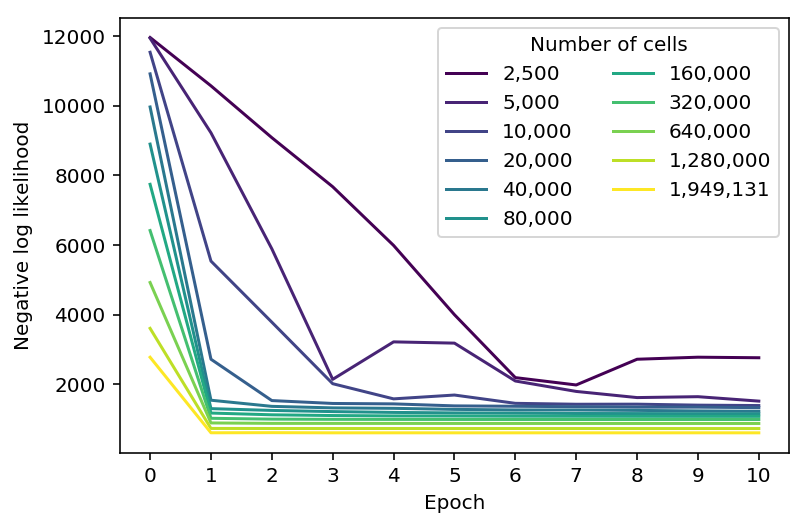

In [6]:
i = 0
for n, h in inf_histo.iterrows():
    plt.plot(h, label=f'{n:,}', c=colors(i / inf_histo.shape[0]))
    i += 1
    
plt.xlabel('Epoch')
plt.ylabel('Negative log likelihood');
plt.legend(title='Number of cells', ncol=2);

plt.savefig('figures/epoch-v-ll.pdf')